In [16]:
import pandas as pd

In [17]:
train_df=pd.read_csv('/content/drive/MyDrive/LP-5-master/DL/Assignment_3/Google_Stock_Price_Train.csv')
test_df=pd.read_csv('/content/drive/MyDrive/LP-5-master/DL/Assignment_3/Google_Stock_Price_Test.csv')

In [18]:
train_df


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [19]:
test_df

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [20]:
train_df.corr()['Open'].sort_values()

<ipython-input-20-613b4251515e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()['Open'].sort_values()


Low     0.999498
High    0.999692
Open    1.000000
Name: Open, dtype: float64

In [21]:
x_train=train_df['Open']
x_test=test_df['Open']
y_train=train_df['Open']
y_test=test_df['Open']

In [22]:
x_train=x_train[1:1257]
x_test=x_test[1:18]
y_train=y_train[2:1258]
y_test=y_test[2:19]

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)


In [26]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

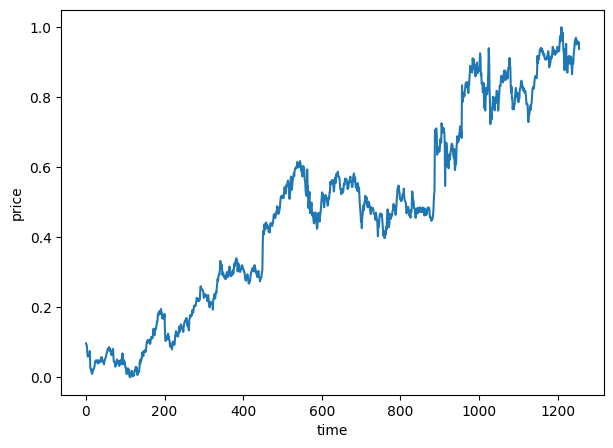

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot(x_train)
plt.xlabel('time')
plt.ylabel('price')
plt.show()


In [38]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Dropout

In [39]:
model=Sequential()

In [40]:
model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True,input_shape=(1,1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 1, 50)             2600      
                                                                 
 dropout_4 (Dropout)         (None, 1, 50)             0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 1, 50)             5050      
                                                                 
 dropout_5 (Dropout)         (None, 1, 50)             0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 1, 50)             5050      
                                                                 
 dropout_6 (Dropout)         (None, 1, 50)             0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 50)               

In [43]:
model.fit(x_train,y_train,epochs=100,validation_split=0.05)

Epoch 1/100
38/38 [==============================] - 0s 12ms/step - loss: 275131.9688 - accuracy: 0.0000e+00 - val_loss: 581618.6250 - val_accuracy: 0.0000e+00
Epoch 2/100
38/38 [==============================] - 0s 10ms/step - loss: 273466.8125 - accuracy: 0.0000e+00 - val_loss: 579156.6875 - val_accuracy: 0.0000e+00
Epoch 3/100
38/38 [==============================] - 0s 10ms/step - loss: 271737.0312 - accuracy: 0.0000e+00 - val_loss: 576620.6875 - val_accuracy: 0.0000e+00
Epoch 4/100
38/38 [==============================] - 0s 10ms/step - loss: 270022.0625 - accuracy: 0.0000e+00 - val_loss: 574031.5000 - val_accuracy: 0.0000e+00
Epoch 5/100
38/38 [==============================] - 0s 10ms/step - loss: 268405.1250 - accuracy: 0.0000e+00 - val_loss: 571434.6875 - val_accuracy: 0.0000e+00
Epoch 6/100
38/38 [==============================] - 0s 10ms/step - loss: 266594.5312 - accuracy: 0.0000e+00 - val_loss: 568811.8125 - val_accuracy: 0.0000e+00
Epoch 7/100
38/38 [=====================

In [44]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 44ms/step - loss: 383453.7188 - accuracy: 0.0000e+00


[383453.71875, 0.0]

In [48]:
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 406ms/step


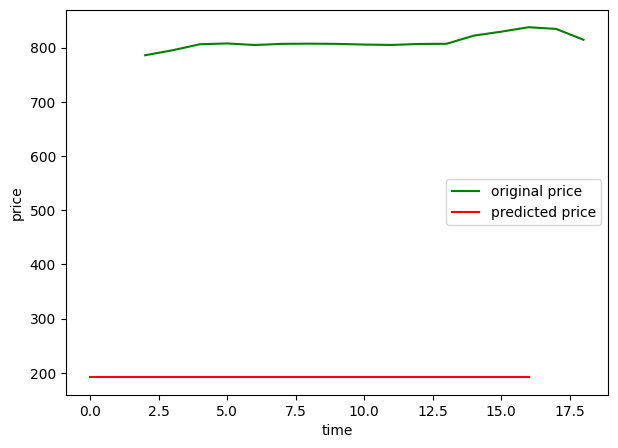

In [50]:
plt.figure(figsize=(7,5))
plt.plot(y_test,color='g',label='original price')
plt.plot(y_pred,color='r',label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
y_pred=y_test